For every increase in point per loan, how much more down would you have to increase. 

1. Develop montly mortgage cost given home cost
2. How much more down have to increase (%) for every increase in (%) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [2]:
class LoanDown:
    def __init__(self, home_price, loan_amount, loan_interest_rate, 
                 loan_length_in_years, taxes_and_insurance):
        self.home_price = home_price
        self.loan_amount = loan_amount
        self.loan_interest_rate = loan_interest_rate
        self.loan_length_in_years = loan_length_in_years
        self.taxes_and_insurance = taxes_and_insurance
        self.monthly_payment = self.monthly_mortgage()
        self.down_payment = home_price - loan_amount
        
    def monthly_mortgage(self):
        """ 
        monthly mortgage calculator: 
        M= P[r(1+r)^n/((1+r)^n)-1)]
        """
        monthly_interest_rate = self.loan_interest_rate/12
        num_payments = self.loan_length_in_years * 12
        interest_scale =(1+monthly_interest_rate) ** num_payments 
        numerator = monthly_interest_rate * interest_scale 
        denominator = interest_scale-1 
        monthly = self.loan_amount * (numerator/denominator)
        return monthly
    

In [3]:
def monthly_mortgage(loan_interest_rate, loan_length_in_years, loan_amount):
    """ 
    monthly mortgage calculator: 
    M= P[r(1+r)^n/((1+r)^n)-1)]
    """
    monthly_interest_rate = loan_interest_rate/100/12
    num_payments = loan_length_in_years * 12
    interest_scale =(1+monthly_interest_rate) ** num_payments 
    numerator = monthly_interest_rate * interest_scale 
    denominator = interest_scale-1 
    monthly = loan_amount * (numerator/denominator)
    return round(monthly,2)

def max_loan_calculator(loan_interest_rate, loan_length_in_years, monthly_payment_target):
    monthly_interest_rate = loan_interest_rate/100/12
    num_payments = loan_length_in_years * 12
    interest_scale =(1+monthly_interest_rate) ** num_payments 
    numerator = monthly_interest_rate * interest_scale 
    denominator = interest_scale-1 
    loan_amount = monthly_payment_target / (numerator/denominator)
    return round(loan_amount, 2)

In [21]:
max_loan_calculator(loan_interest_rate=7, 
                    loan_length_in_years=30, 
                    monthly_payment_target=2500)

375768.92

In [104]:
max_monthly = 5000 # this parameter doesnt matter in creating the heatmap
current_interest_rate = np.linspace(2,10,17)
future_interest_rate = np.linspace(2,10,17)
mapping = pd.DataFrame()

for current in current_interest_rate: 
    bp = []
    for future in future_interest_rate:
        current_home = round(max_loan_calculator(current, 
                                                 loan_length_in_years=30, 
                                                 monthly_payment_target=max_monthly),2)
        future_home = round(max_loan_calculator(future, 
                                                loan_length_in_years=30, 
                                                monthly_payment_target=max_monthly),2)
        bp.append(round((future_home/current_home)*100))
    mapping[current] = bp
mapping.index = current_interest_rate

In [52]:
mapping.to_csv('current_to_future.csv')

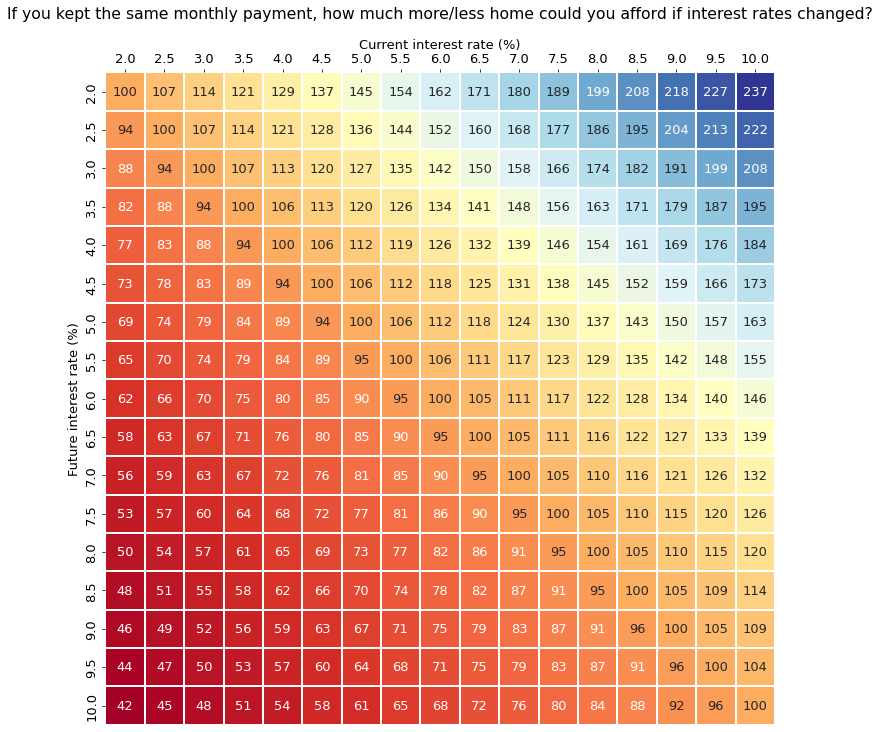

In [97]:
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 13})
ax = sns.heatmap(mapping, cmap ='RdYlBu', linewidths = 0.30, annot = True,fmt='g', cbar=False)
ax.set_xlabel('Current interest rate (%)')
ax.set_ylabel('Future interest rate (%)')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top() 
ax.set_title('If you kept the same monthly payment, how much more/less home could you afford if interest rates changed?', pad=20)
fig = ax.get_figure()
fig.savefig("heatmap.png", facecolor='white', transparent=False) 